<a href="https://colab.research.google.com/github/Melaka36/CodeZ/blob/main/SMOTE_Model_Training(Without_CV).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns # data visualization

import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc


In [ ]:
df=pd.read_csv("drive/MyDrive/4th_Year_Research/Implementation/Dataset/Pre-Processed-Dataset.csv")
df.shape

(3630, 25)

# Splitting data into X and Y

In [ ]:
#will drop the Nationality and International columns since they are highly correlated and only one nationality significantly dominates the data.
X = df.drop(columns=['Target'], axis=1)
Y = df['Target']

In [ ]:
X.shape

(3630, 24)

In [ ]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 24 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3630 non-null   int64  
 1   Application mode                                3630 non-null   int64  
 2   Application order                               3630 non-null   int64  
 3   Course                                          3630 non-null   int64  
 4   Daytime/evening attendance                      3630 non-null   int64  
 5   Previous qualification                          3630 non-null   int64  
 6   Nacionality                                     3630 non-null   int64  
 7   Mother's qualification                          3630 non-null   int64  
 8   Father's qualification                          3630 non-null   int64  
 9   Mother's occupation                      

In [ ]:
Y.head()

0    0
1    1
2    0
3    1
4    1
Name: Target, dtype: int64



---

# Splitting Data Into Training and Testing

---



In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(3630, 24) (2904, 24) (726, 24)


# SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smote = SMOTE(random_state=2)

# Apply SMOTE to the training data
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

# Check the class distribution after oversampling
unique, counts = np.unique(Y_train_resampled, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class distribution after SMOTE:", class_distribution)


Class distribution after SMOTE: {0: 1773, 1: 1773}


In [ ]:
count_of_zeros = (Y_train_resampled == 1).sum()
print(f"Number of rows with Target = 0: {count_of_zeros}")

Number of rows with Target = 0: 1773


In [ ]:
X_train = X_train_resampled
Y_train = Y_train_resampled
count_of_ones = (Y_train == 1).sum()
count_of_zeros = (Y_train == 0).sum()
print(f"Number of rows with Target = 0: {count_of_zeros}")
print(f"Number of rows with Target = 1: {count_of_ones }")

Number of rows with Target = 0: 1773
Number of rows with Target = 1: 1773


# **Model Training**

# Logistic Regression

In [ ]:
clf = LogisticRegression(max_iter=1000)  # Increase max_iter value
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)

Accuracy: 0.7589531680440771
Precision: 0.7919463087248322
Recall: 0.8119266055045872
F1-Score: 0.8018120045300113
ROC-AUC: 0.7456184751660866


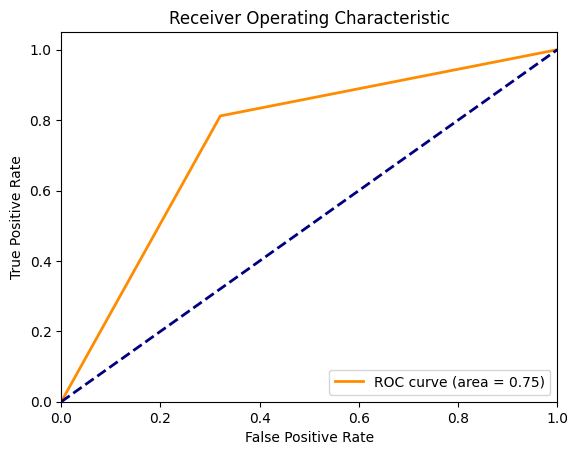

In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, y_pred)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, y_pred)
print("ROC-AUC:", roc_auc)

# ROC Curve (if you want to visualize it)
fpr, tpr, _ = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[197  93]
 [ 82 354]]


Training Accuracy: 0.7749576988155669
Testing Accuracy: 0.7589531680440771


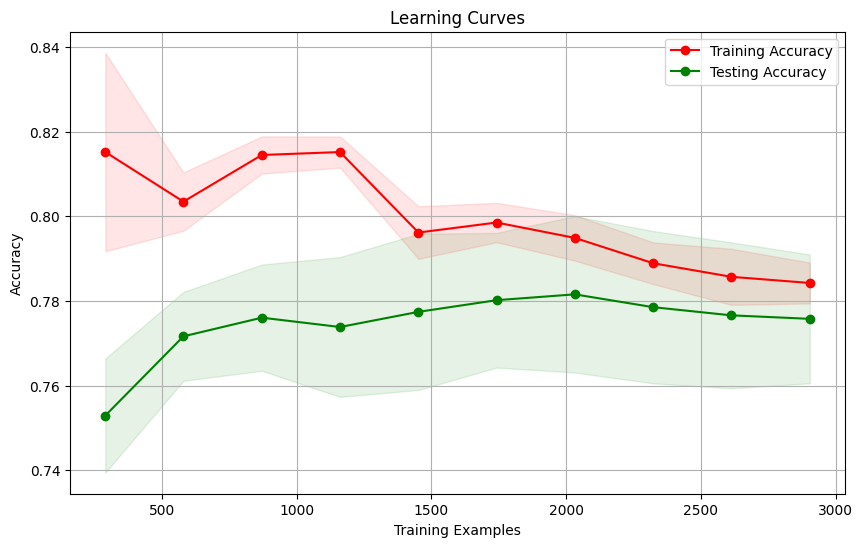

In [ ]:
train_predictions = clf.predict(X_train)

# Predict on the test set
test_predictions = clf.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = (train_predictions == Y_train).mean()
test_accuracy = (test_predictions == Y_test).mean()

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Plot learning curve
plt.figure(figsize=(10, 6))
train_sizes, train_scores, test_scores = learning_curve(clf, X, Y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing Accuracy")
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend(loc="best")
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import log_loss

# # Logistic Regression
# clf = LogisticRegression(max_iter=1000)
# clf.fit(X_train, Y_train)
# y_pred = clf.predict(X_test)

# Get training loss (if available)
try:
    train_loss = clf.history_['loss']
except AttributeError:
    train_loss = None

# Get validation loss (if available)
try:
    val_loss = log_loss(Y_test, clf.predict_proba(X_test)[:, 1])
except AttributeError:
    val_loss = None

# Plot loss curve
plt.figure(figsize=(10, 6))
if train_loss is not None:
    plt.plot(range(len(train_loss)), train_loss, label='Training Loss')
if val_loss is not None:
    plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curve - Logistic Regression')
plt.legend()
plt.show()


# Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

#without scaling
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and without Cross Validation: ",accuracy_score(Y_test,y_pred))
scores = cross_val_score(clf, X_train, Y_train, cv=5)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and without Cross Validation:  0.7520661157024794
Without Scaling and With CV:  0.7944150658535133


Accuracy: 0.7520661157024794
Precision: 0.7935779816513762
Recall: 0.7935779816513762
F1-Score: 0.7935779816513762
ROC-AUC: 0.7416165770325847


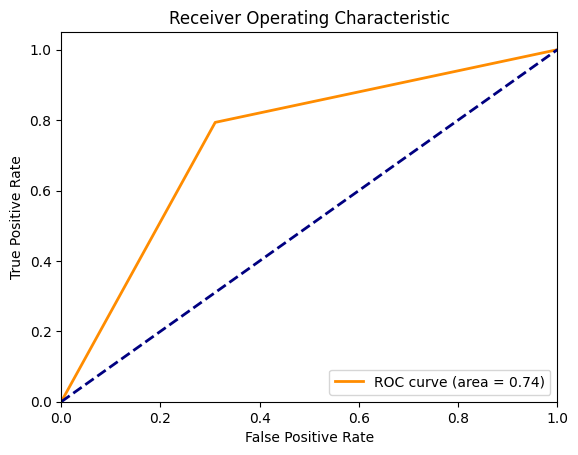

In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, y_pred)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, y_pred)
print("ROC-AUC:", roc_auc)

# ROC Curve (if you want to visualize it)
fpr, tpr, _ = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[200  90]
 [ 90 346]]


<Axes: >

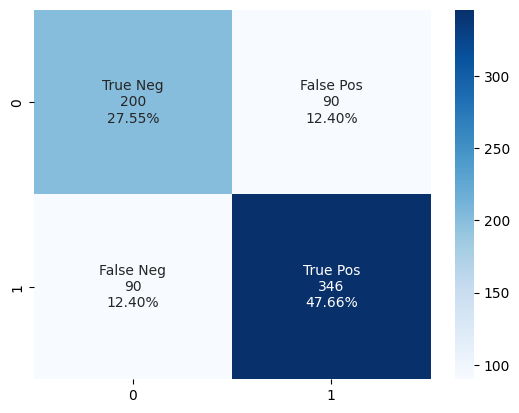

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
# train_predictions = clf.predict(X_train)

# # Predict on the test set
# test_predictions = clf.predict(X_test)

# # Calculate training and testing accuracies
# train_accuracy = (train_predictions == Y_train).mean()
# test_accuracy = (test_predictions == Y_test).mean()

# print("Training Accuracy:", train_accuracy)
# print("Testing Accuracy:", test_accuracy)

# # Plot learning curve
# plt.figure(figsize=(10, 6))
# train_sizes, train_scores, test_scores = learning_curve(clf, X, Y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
# plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
# plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing Accuracy")
# plt.xlabel('Training Examples')
# plt.ylabel('Accuracy')
# plt.title('Learning Curves')
# plt.legend(loc="best")
# plt.grid()
# plt.show()

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train,Y_train)


RandomForestClassifier(max_depth=10, random_state=0)

In [ ]:
y_pred = clf.predict(X_test)
print("Without Scaling and without CV: ",accuracy_score(Y_test,y_pred))
scores = cross_val_score(clf, X_train, Y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and without CV:  0.8333333333333334
Without Scaling and With CV:  0.83760085939365


In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, y_pred)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, y_pred)
print("ROC-AUC:", roc_auc)



Accuracy: 0.8333333333333334
Precision: 0.841648590021692
Recall: 0.8899082568807339
F1-Score: 0.8651059085841695
ROC-AUC: 0.8190920594748499


In [ ]:
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[217  73]
 [ 48 388]]


# Support Vector Machines

In [ ]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')

svc = SVC()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
clf = GridSearchCV(svc, parameters)

clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)


In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, y_pred)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, y_pred)
print("ROC-AUC:", roc_auc)


Accuracy: 0.7933884297520661
Precision: 0.8264840182648402
Recall: 0.8302752293577982
F1-Score: 0.8283752860411899
ROC-AUC: 0.7841031319202784


# Naive Bayers

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,Y_train)

y_pred = clf.predict(X_test)

In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, y_pred)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, y_pred)
print("ROC-AUC:", roc_auc)

# ROC Curve (if you want to visualize it)
fpr, tpr, _ = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

# # Plot ROC Curve
# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")
# plt.show()

Accuracy: 0.7424242424242424
Precision: 0.7475149105367793
Recall: 0.8623853211009175
F1-Score: 0.8008519701810438
ROC-AUC: 0.7122271433090794


In [ ]:
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[163 127]
 [ 60 376]]


<Axes: >

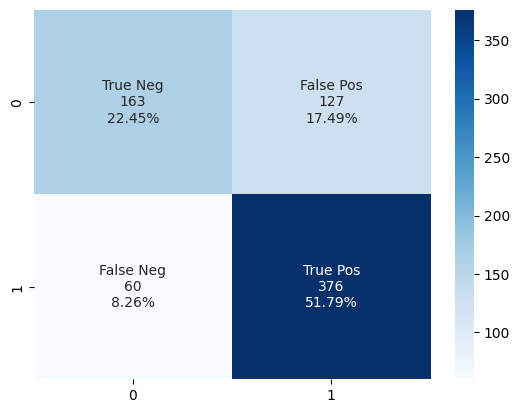

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

# XGBoost

In [ ]:
bin_log = xgb.XGBClassifier(
    n_estimators=100,  # Adjust the number of estimators (trees) as needed
    max_depth=5,  # Adjust the depth of the trees as needed
    learning_rate=0.1,  # Adjust the learning rate as needed
    objective='binary:logistic',  # Use 'binary:logistic' for binary classification
    random_state=42  # Set a random seed for reproducibility
)
bin_log.fit(X_train, Y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
target_prediction = bin_log.predict(X_test)
# print(target_prediction)

In [ ]:
data_accuracy = accuracy_score(Y_test, target_prediction)
print("Accuracy:", data_accuracy)

Accuracy: 0.8319559228650137


In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, target_prediction)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, target_prediction)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, target_prediction)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, target_prediction)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, target_prediction)
print("ROC-AUC:", roc_auc)


Accuracy: 0.8319559228650137
Precision: 0.8398268398268398
Recall: 0.8899082568807339
F1-Score: 0.8641425389755012
ROC-AUC: 0.8173679215438152


Training Accuracy: 0.9207557811618725
Testing Accuracy: 0.8319559228650137


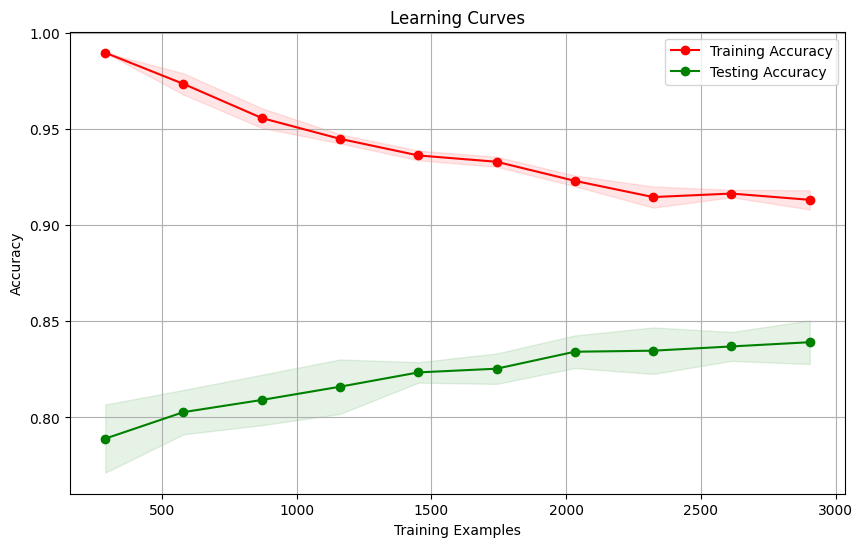

In [ ]:
train_predictions = bin_log.predict(X_train)

# Predict on the test set
test_predictions = bin_log.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = (train_predictions == Y_train).mean()
test_accuracy = (test_predictions == Y_test).mean()

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Plot learning curve
plt.figure(figsize=(10, 6))
train_sizes, train_scores, test_scores = learning_curve(bin_log, X, Y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing Accuracy")
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend(loc="best")
plt.grid()
plt.show()

# Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Fit the classifier on the training data
gb_classifier.fit(X_train, Y_train)
5
# Make predictions on the test data
target_prediction = gb_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, target_prediction)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8333333333333334


In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, target_prediction)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, target_prediction)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, target_prediction)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, target_prediction)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, target_prediction)
print("ROC-AUC:", roc_auc)

# ROC Curve (if you want to visualize it)
fpr, tpr, _ = roc_curve(Y_test, target_prediction)
roc_auc = auc(fpr, tpr)

Accuracy: 0.8333333333333334
Precision: 0.8492239467849224
Recall: 0.8784403669724771
F1-Score: 0.8635851183765503
ROC-AUC: 0.8219788041758938


In [ ]:
pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.2 MB/s eta 0:00:00


# CatBoost

In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=100,  # number of iterations
                           depth=5,  # the depth of the trees
                           learning_rate=0.1,  # the learning rate
                           loss_function='Logloss',  # 'Logloss' for binary classification
                           random_seed=42)  # random seed for reproducibility

model.fit(X_train, Y_train)

target_prediction = model.predict(X_test)

# Evaluate the model's accuracy on the test data
accuracy = accuracy_score(Y_test, target_prediction)
print(f'Accuracy: {accuracy:.6f}')

0:	learn: 0.6337115	total: 48.3ms	remaining: 4.78s
1:	learn: 0.5949862	total: 50.7ms	remaining: 2.48s
2:	learn: 0.5570796	total: 52.5ms	remaining: 1.7s
3:	learn: 0.5278990	total: 54.6ms	remaining: 1.31s
4:	learn: 0.5023456	total: 56.6ms	remaining: 1.07s
5:	learn: 0.4839063	total: 58.6ms	remaining: 918ms
6:	learn: 0.4713886	total: 60.5ms	remaining: 804ms
7:	learn: 0.4587554	total: 62.6ms	remaining: 720ms
8:	learn: 0.4487972	total: 64.6ms	remaining: 654ms
9:	learn: 0.4433460	total: 66.9ms	remaining: 602ms
10:	learn: 0.4387683	total: 68.9ms	remaining: 557ms
11:	learn: 0.4326159	total: 70.9ms	remaining: 520ms
12:	learn: 0.4275054	total: 73ms	remaining: 488ms
13:	learn: 0.4198221	total: 75ms	remaining: 461ms
14:	learn: 0.4137820	total: 76.8ms	remaining: 435ms
15:	learn: 0.4099033	total: 78.6ms	remaining: 413ms
16:	learn: 0.4059952	total: 80.5ms	remaining: 393ms
17:	learn: 0.4031107	total: 82.3ms	remaining: 375ms
18:	learn: 0.3994693	total: 84.7ms	remaining: 361ms
19:	learn: 0.3956025	total:

In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, target_prediction)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, target_prediction)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, target_prediction)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, target_prediction)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, target_prediction)
print("ROC-AUC:", roc_auc)

# ROC Curve (if you want to visualize it)
fpr, tpr, _ = roc_curve(Y_test, target_prediction)
roc_auc = auc(fpr, tpr)

Accuracy: 0.8388429752066116
Precision: 0.8505494505494505
Recall: 0.8876146788990825
F1-Score: 0.8686868686868687
ROC-AUC: 0.8265659601391964


# AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(n_estimators=300,  # Adjust the number of estimators (trees) as needed
                  learning_rate=0.1)  # Adjust the learning rate as needed

model.fit(X_train_resampled, Y_train_resampled)

target_prediction = model.predict(X_test)

# Evaluate the model's accuracy on the test data
accuracy = accuracy_score(Y_test, target_prediction)
print(f'Accuracy: {accuracy:.6f}')

Accuracy: 0.820937


In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, target_prediction)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, target_prediction)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, target_prediction)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, target_prediction)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, target_prediction)
print("ROC-AUC:", roc_auc)

# ROC Curve (if you want to visualize it)
fpr, tpr, _ = roc_curve(Y_test, target_prediction)
roc_auc = auc(fpr, tpr)

Accuracy: 0.8209366391184573
Precision: 0.8430493273542601
Recall: 0.8623853211009175
F1-Score: 0.8526077097505669
ROC-AUC: 0.8105030053780449
